# 미니 프로젝트 (60분)

### Example 

이번에는 앞서 배운 정보량의 이론을 활용하여 다음의 주어진 문제를 풀어보도록 하겠습니다. 

**[문제 1-1]**<br/>

모두 동일한 확률을 갖는 동전을 던질 경우 이에 대한 정보량을 계산하십시오



In [ ]:
from math import log2

In [ ]:
# 사건에 대한 확률
p = 0.5
# information
I = -log2(p)

print( ' p(x)=%.3f, information: %.3f bits ' % (p, I))

**[문제 1-2]**<br/>

앞선 [문제 1-1]의 풀이방식을 활용하여 확률이 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]로 변화함에 따라 정보량이 어떻게 변화는지를 코드로 작성하고 결과에 대해 서술하시오


In [2]:
from math import log2
import matplotlib.pyplot as plt

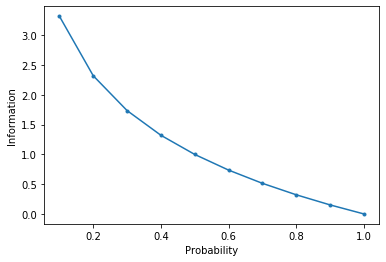

In [4]:
# 비교할 확률 리스트
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# information
info = [-log2(p) for p in probs]

# plot probability vs information
plt.plot(probs, info, marker= '.' )
plt.xlabel('Probability')
plt.ylabel('Information')
plt.show()

위의 결론에 의해서 정보량과 확률은 서로 반비례함을 알 수 있습니다.

**[문제 2-1]**<br/>

앞선 예제와 마찬가지로, 1/2의 모두 동일한 확률로 앞/뒤면이 나오는 동전을 던질 때의 variable에 대한 entropy를 구하시오. 그리고 앞선 [문제 1-1]과의 결과와 비교하시오


In [5]:
from math import log2

In [6]:
# 사건 횟수
n = 2
# 사건의 확률
p = 1.0 /n

# entropy
entropy = -sum([p * log2(p) for _ in range(n)])

print('entropy: {} bits'.format(entropy))

entropy: 1.0 bits


주어진 문제의 동전은 모두 1/2의 확률을 가지므로 uniform probability distribution입니다. 그러므로 앞선 [문제 1-1]에서 정보량을 계산한 값과 동일하게 결과가 나옵니다.

**[문제 2-2]**<br/>
앞선 [문제 1-1]의 풀이방식을 활용하여 확률이 [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]]로 변화함에 따라 정보량이 어떻게 변화는지를 코드로 작성하고 결과에 대해 서술하시오

In [7]:
from math import log2
import matplotlib.pyplot as plt

In [24]:
# entropy
def entropy(events, ets=1e-15):
    entropy = []
    for p in events:
        entropy.append(p * log2(p + ets))
    return -sum(entropy)

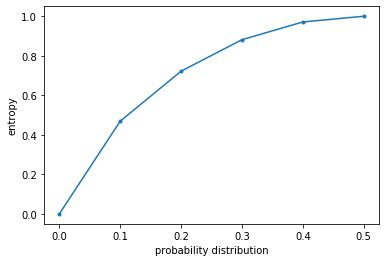

In [25]:
# 비교할 확률 리스트
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# 확률분포
p_distr = [[p, 1.0 - p] for p in probs]

# 각각의 분포에 대한 entropy
ents = [entropy(dist) for dist in p_distr]

# plot probability distribution vs entropy
plt.plot(probs, ents, marker= '.' )
plt.xlabel('probability distribution')
plt.ylabel('entropy')
plt.show()

**[문제 3, 4]**<br/>

어떠한 상자에 5가지의 색을 가진 공이 존재합니다. 그리고 상자에 손을 넣어 어떠한 색을 뽑을 두 확률 분포가 존재할 때, KL divergence와 Cross-entropy를 각각 구해보겠습니다. 

* 상자속 공의 색: red, blue, black

* 두 확률 분포
    * p = [0.05, 0.25, 0.7]
    * q = [0.85, 0.05, 0.1]
    

**[문제 3-1]**
먼저, 주어진 문제에 대해서 확률분포를 정의하겠습니다. 

In [26]:
from math import log2

In [27]:
events = ['red', 'blue', 'green', 'yellow', 'black']
p = [0.05, 0.25, 0.7]
q = [0.85, 0.05, 0.1]

**[문제 3-2]**
주어진 확률 분포에 대해서 확률의 특성을 만족하는지에 대해서 확인하겠습니다. 

In [28]:
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))

P=1.000 Q=1.000


**[문제 3-3]** 두 확률 분포의 KL divergence를 구하여보겠습니다. 

In [29]:
def kl_divergence(p, q):
    ret = []
    for i in range(len(p)):
        ret.append(p[i] * log2(p[i]/q[i]))
                   
    return sum(ret)

In [30]:
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)

KL(P || Q): 2.341 bits


**[문제 3-4]** KL divergence의 symmetric에 대해서 확인하겠습니다. 

In [31]:
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(Q || P): 3.078 bits


**[문제 4-1]** 위에서의 두 확률분포에 대한 Cross-entropy를 구하여보겠습니다. 

In [32]:
def cross_entropy0(p, q):
    ret = []
    for i in range(len(p)):
        ret.append(p[i]*log2(q[i]))
        
    return -sum(ret)

In [33]:
ce_pq = cross_entropy0(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

ce_qp = cross_entropy0(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.418 bits
H(Q, P): 3.825 bits


**[문제 4-2]** 위에서의 구한 KL divergence를 활요하여 Cross-entropy를 구하여보겠습니다. 

In [34]:
def kl_divergence(p, q):
    ret = []
    for i in range(len(p)):
        ret.append(p[i] * log2(p[i]/q[i]))
    
    return sum(ret)
 
def entropy(p):
    entropy = []
    for i in range(len(p)):
        entropy.append(p[i] * log2(p[i]))
    
    return -sum(entropy)
 
def cross_entropy1(p, q):
    return entropy(p) + kl_divergence(p, q)

In [35]:
en_p = entropy(p)
print('H(P): %.3f bits' % en_p)

kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)

ce_pq = cross_entropy1(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

H(P): 1.076 bits
KL(P || Q): 2.341 bits
H(P, Q): 3.418 bits


### Problem

**[문제 1-1]**<br/>

모두 동일한 확률을 갖는 주사위를 던질 경우 이에 대한 정보량을 계산하십시오


**[문제 1-2]**<br/>

앞선 [문제 1-1]의 풀이방식을 활용하여 확률이 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]로 변화함에 따라 정보량이 어떻게 변화는지를 코드로 작성하고 결과에 대해 서술하시오


위의 결론에 의해서 정보량과 확률은 서로 반비례함을 알 수 있습니다.

**[문제 2-1]**<br/>

앞선 예제와 마찬가지로, 1/6의 모두 동일한 확률로 6면이 나오는 주사위를 던질 때의 variable에 대한 entropy를 구하시오. 그리고 앞선 [문제 1-1]과의 결과와 비교하시오


주어진 문제의 주사위는 모든 면이 1/6의 확률을 가지므로 uniform probability distribution입니다. 그러므로 앞선 [문제 1-1]에서 정보량을 계산한 값과 동일하게 결과가 나옵니다.

**[문제 2-2]**<br/>
앞선 [문제 1-1]의 풀이방식을 활용하여 확률이 [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]]로 변화함에 따라 정보량이 어떻게 변화는지를 코드로 작성하고 결과에 대해 서술하시오

**[문제 3, 4]**<br/>

어떠한 상자에 5가지의 색을 가진 공이 존재합니다. 그리고 상자에 손을 넣어 어떠한 색을 뽑을 두 확률 분포가 존재할 때, KL divergence와 Cross-entropy를 각각 구해보겠습니다. 

* 상자속 공의 색: red, blue, gleen, yellow, black

* 두 확률 분포
    * p = [0.05, 0.25, 0.25, 0.05, 0.4]
    * q = [0.4, 0.05, 0.1, 0.2, 0.25]
    

**[문제 3-1]**
먼저, 주어진 문제에 대해서 확률분포를 정의하겠습니다. 

**[문제 3-2]**
주어진 확률 분포에 대해서 확률의 특성을 만족하는지에 대해서 확인하겠습니다. 

**[문제 3-3]** 두 확률 분포의 KL divergence를 구하여보겠습니다. 


**[문제 3-4]** KL divergence의 symmetric에 대해서 확인하겠습니다. 

**[문제 4-1]** 위에서의 두 확률분포에 대한 Cross-entropy를 구하여보겠습니다. 

**[문제 4-2]** 위에서의 구한 KL divergence를 활요하여 Cross-entropy를 구하여보겠습니다. 